In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
from matplotlib import pylab
from scipy import stats

In [60]:
songs = pd.read_csv("weeklySongsWithPopularity.csv",sep=",")
songs = songs[songs["Spotify_Popularity"] > 0]

In [161]:
songs.head()

,date,Rank,Title,Artist,Weeks on chart,year,Spotify_Popularity
18,1955-01-01,19,Everybody Loves A Lover,Doris Day,NaN,1955,26
118,1955-01-08,19,Everybody Loves A Lover,Doris Day,NaN,1955,26
218,1955-01-15,19,Everybody Loves A Lover,Doris Day,NaN,1955,26
318,1955-01-22,19,Everybody Loves A Lover,Doris Day,NaN,1955,26
418,1955-02-01,19,Everybody Loves A Lover,Doris Day,NaN,1955,26


In [84]:
visited = {}
titleList = []
artistList = []
yearList = []
spotifyPopularityList = []
for index, row in songs.iterrows():
    if (row['Title'], row['Artist']) not in visited.keys():
        visited[row['Title'], row['Artist']] = 1
        titleList.append(row['Title'])
        artistList.append(row['Artist'])
        yearList.append(row['year'])
        spotifyPopularityList.append(row['Spotify_Popularity'])
        
df = pd.DataFrame({
    'Title': titleList,
    'Artist': artistList,
    'year': yearList,
    'Spotify_Popularity': spotifyPopularityList
})

df.head()

,Title,Artist,year,Spotify_Popularity
0,Everybody Loves A Lover,Doris Day,1955,26
1,Drip Drop,The Drifters,1958,12
2,Just Married,Marty Robbins,1958,20
3,Moonlight Bay,The Drifters,1958,8
4,Midnighter,The Champs,1958,19


In [85]:
uniqueSongs = df

In [87]:
popularArtists = uniqueSongs[["Artist", "Title"]].groupby(["Artist"])["Title"].count().reset_index(name='count').sort_values(['count'], ascending=False).head(20)
popularArtists

,Artist,count
1138,Glee Cast,142
2765,Taylor Swift,61
860,Drake,54
923,Elton John,46
3015,The Rolling Stones,43
1845,Madonna,43
2685,Stevie Wonder,42
2813,The Beach Boys,38
3112,Tim McGraw,36
166,Aretha Franklin,36


/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



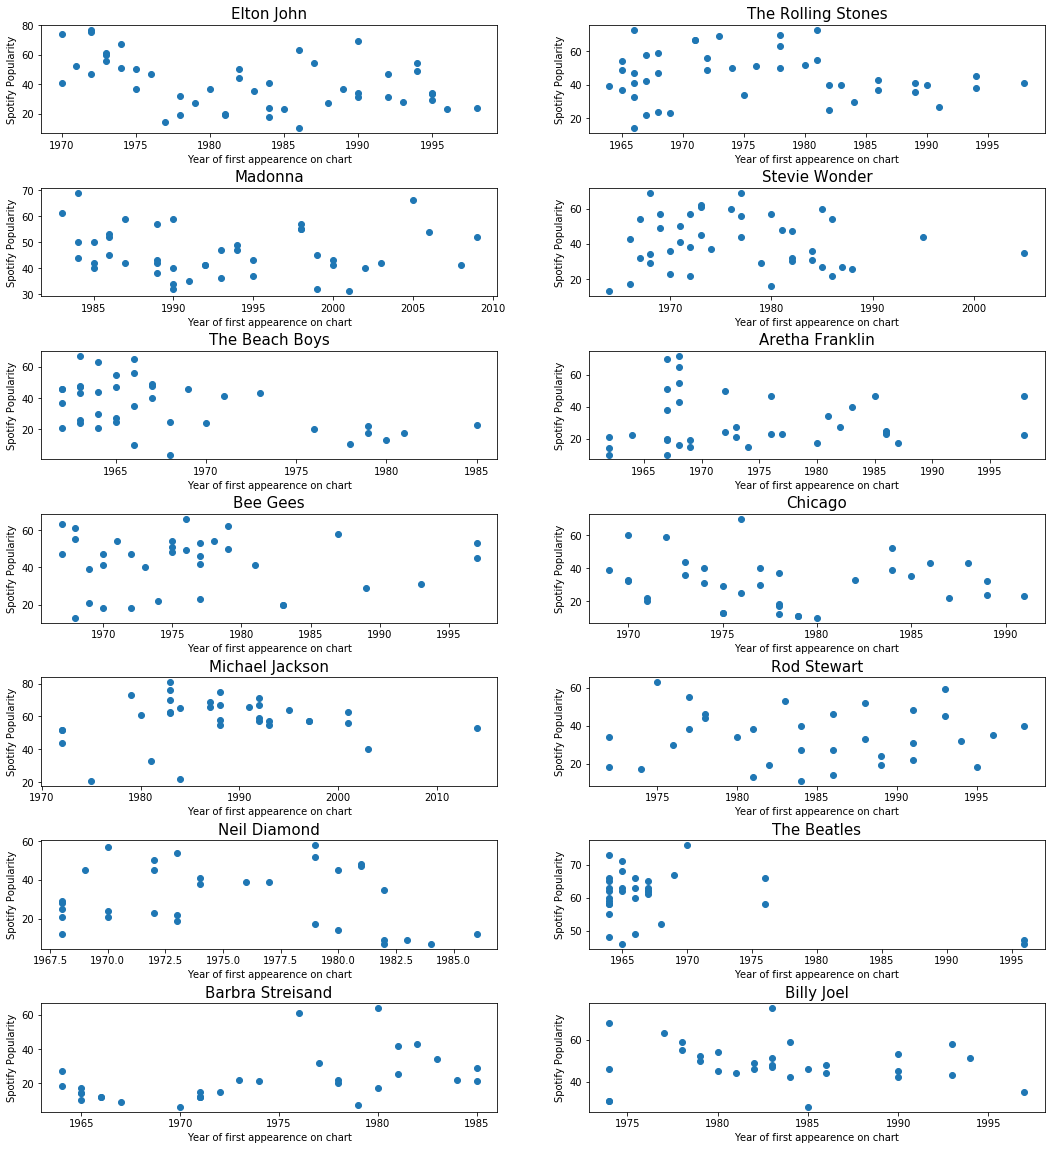

In [134]:
count = 0
plt.rcParams['figure.figsize'] = [18.0, 20.0]
fig=plt.figure(1)
fig.subplots_adjust(hspace=.5)
fig.add_subplot(721)

for index, row in popularArtists.iterrows():
    artistSongs = uniqueSongs[uniqueSongs["Artist"] == row['Artist']]
    minmYear = min(artistSongs["year"])
    if minmYear > 1990:
        continue
        
    count = count + 1
    if count > 14:
        break
    
    plt.subplot(7, 2, count)
    plt.plot(artistSongs['year'], artistSongs['Spotify_Popularity'], 'o')
    plt.xlabel('Year of first appearence on chart')
    plt.ylabel('Spotify Popularity')
    plt.title(artistSongs['Artist'].iloc[0], fontsize=15)
    
plt.show()


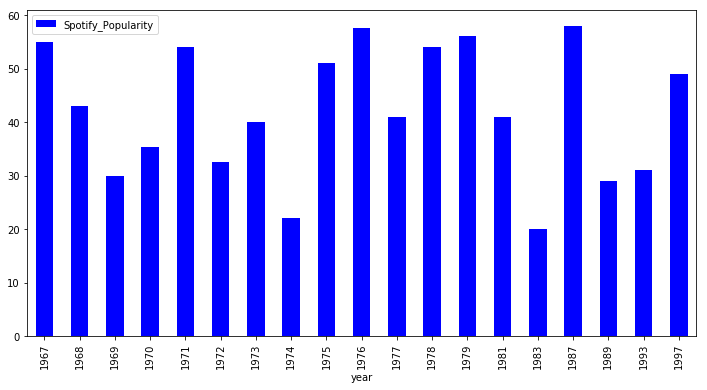

In [135]:
artistSongs = uniqueSongs[uniqueSongs["Artist"] == 'Bee Gees']
artistSongs.head()
    
medianPopularity = artistSongs.groupby('year').mean().reset_index()
plt.rcParams['figure.figsize'] = [12.0, 6.0]
ax = medianPopularity.plot.bar(x='year', y='Spotify_Popularity', color='blue')
plt.show()

# One Hit Wonders

In [156]:
oneHitArtists = uniqueSongs[["Artist", "Title"]].groupby(["Artist"])["Title"].count().reset_index(name='count').sort_values(['count'], ascending=False).tail(1500)
oneHitArtists


,Artist,count
3253,Walker Hayes,1
3164,Traffic,1
3336,Young And Restless,1
2335,Ray Kennedy,1
3166,Trans-X,1
3167,Transvision Vamp,1
3280,Wet Wet Wet,1
2389,Rise Against,1
2433,Romeo Void,1
3286,White Town,1


In [160]:
titleList = []
artistList = []
spotifyPopularityList = []
yearList = []
rankList = []
for index, row in oneHitArtists.iterrows():
    artistSongs = uniqueSongs[uniqueSongs["Artist"] == row['Artist']]
    
    if artistSongs['year'].iloc[0] > 1990:
        continue
        
    if artistSongs['Rank'].iloc[0] > 10:
        continue
        
    titleList.append(artistSongs['Title'].iloc[0])
    artistList.append(artistSongs['Artist'].iloc[0])
    yearList.append(artistSongs['year'].iloc[0])
    spotifyPopularityList.append(artistSongs['Spotify_Popularity'].iloc[0])
    rankList.append(artistSongs['Rank'].iloc[0])
    
df = pd.DataFrame({
    'Title': titleList,
    'Artist': artistList,
    'year': yearList,
    'Spotify_Popularity': spotifyPopularityList
})

df.sort_values(by='Spotify_Popularity', ascending=False)

KeyError: 'Rank'